In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\model_with_flask\dataset.csv")
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,111,688,409,0
1,1,0.067,2,0,0,0,0,58,353,456,0
2,1,0.000,0,0,0,0,0,44,535,364,0
3,1,0.000,2,14,0,0,1,81,3109,298,0
4,1,0.000,2,0,0,0,1,498,1071,1999,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.308,1,0,0,0,0,0,87,4609,1
996,1,0.000,3,75,0,0,0,1,103,159,1
997,1,0.000,1,0,0,0,0,0,88,322,1
998,0,0.000,1,0,0,0,0,0,929,1315,1


In [15]:
X=df.iloc[:, 0:11].values
X
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [16]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import pickle 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

670 670
330 330


In [18]:
# Support Vector Machine
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train.values.ravel()) 

SVC(gamma='auto')

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svm, X, y.values.ravel(), cv=4)
scores
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.94 (+/- 0.04)


In [20]:
print("TRAIN SET", clf_svm.score(X_train, y_train))
print("TEST  SET", clf_svm.score(X_test, y_test))


TRAIN SET 0.9447761194029851
TEST  SET 0.9484848484848485


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Real','Fake']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

[[160   5]
 [ 12 153]]


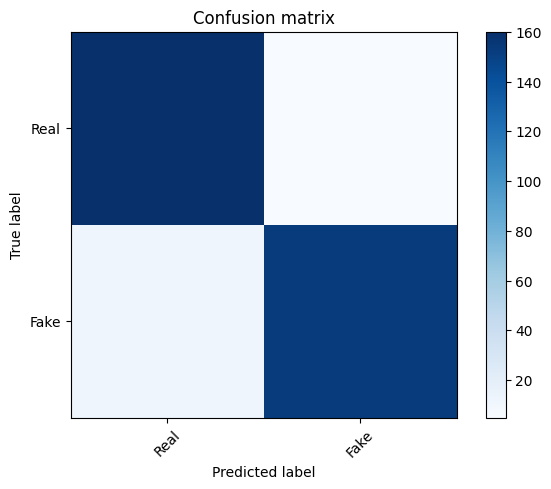

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, clf_svm.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

False Positive rate:  [0.         0.03030303 1.        ]
True Positive rate:  [0.         0.92727273 1.        ]


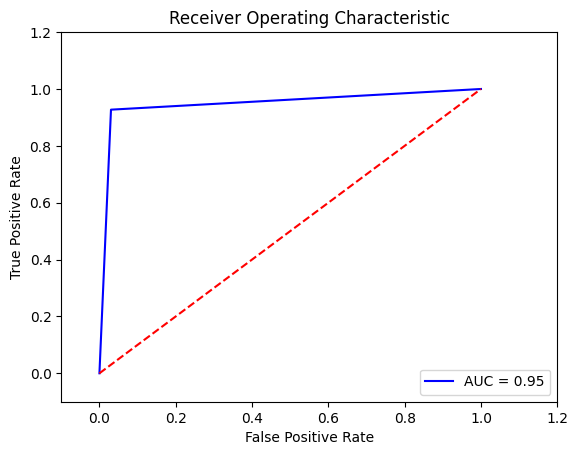

In [23]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc_curve(y_test, clf_svm.predict(X_test))    

In [24]:
print(classification_report(y_test, clf_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       165
           1       0.97      0.93      0.95       165

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        96
           1       0.99      0.96      0.98       104

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



c:\Users\bhati\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
import pickle 
# Assuming svm_model is your trained SVM model
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

    # Load the model from the pickle file
with open('svm_model.pkl', 'rb') as model_file:
    loaded_svm_model = pickle.load(model_file)
